In [16]:
#Challenge Question 1 Starts Here
import csv
!wget -O turnstile_170408.txt http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt?raw=true

--2017-04-13 09:13:49--  http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt?raw=true
Resolving web.mta.info... 66.110.33.216, 66.110.33.240
Connecting to web.mta.info|66.110.33.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘turnstile_170408.txt’

turnstile_170408.tx     [<=>                 ]  24.69M  1.48MB/s    in 17s     

2017-04-13 09:14:07 (1.45 MB/s) - ‘turnstile_170408.txt’ saved [25891626]



In [8]:
count = 0
with open('turnstile_170408.txt', 'r') as f:
    for line in f:
        count += 1
print(count)

197646


In [9]:
count = 0
with open('turnstile_170408.txt', 'r') as f:
    header = f.readline()
    line = f.readline()
    line = line.replace('\n', '')
    line = line.replace(' ', '')
    lineS = line.split(',')
    keyS = (lineS[0], lineS[1], lineS[2], lineS[3])
    station_dic = {keyS : []}
    station_dic[keyS].append(lineS[4:])
    
    for line in f:
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        lineS = line.split(',')
        keyS = (lineS[0], lineS[1], lineS[2], lineS[3])
        if keyS in station_dic.keys():
            station_dic[keyS].append(lineS[4:])
        else:
            station_dic = {keyS : []}
            station_dic[keyS].append(lineS[4:])
            
        count += 1
        #if count == 100:
        #    break
print(header)
#print(line)
#print(keyS)
#print(lineS)
#print(station_dic)
#station_dic.items()
print(count)

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS                                                               

197644


In [2]:
type(station_dic)

dict

In [17]:
#Challenge Question 2 Starts Here
import dateutil.parser
count = 0
with open('turnstile_170408.txt', 'r') as f:
    header = f.readline()
    line = f.readline()
    line = line.replace('\n', '')
    line = line.replace(' ', '')
    lineS = line.split(',')
    keyS = (lineS[0], lineS[1], lineS[2], lineS[3])
    dateTime = ' '.join([lineS[6], lineS[7]])
    dateTime = dateutil.parser.parse(dateTime)
    print(dateTime)
    
    station_dicTime = {keyS : []}
    station_dicTime[keyS].append(dateTime)
    
    for line in f:
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        lineS = line.split(',')
        keyS = (lineS[0], lineS[1], lineS[2], lineS[3])
        dateTime = ' '.join([lineS[6], lineS[7]])
        dateTime = dateutil.parser.parse(dateTime)
        
        if keyS in station_dicTime.keys():
            station_dicTime[keyS].append(dateTime)
        else:
            station_dicTime = {keyS : []}
            station_dicTime[keyS].append(dateTime)
            
        count += 1
        #if count == 5:
        #    break    

print(header)
#print(line)
#print(keyS)
#print(lineS)
#print(station_dicTime)
print(station_dicTime.items())
#print(count)
#print(dateTime)
print(type(dateTime))

2017-04-01 00:00:00
C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS                                                               

dict_items([(('TRAM2', 'R469', '00-05-01', 'RIT-ROOSEVELT'), [datetime.datetime(2017, 4, 1, 1, 0), datetime.datetime(2017, 4, 1, 5, 0), datetime.datetime(2017, 4, 1, 9, 0), datetime.datetime(2017, 4, 1, 13, 0), datetime.datetime(2017, 4, 1, 17, 0), datetime.datetime(2017, 4, 1, 21, 0), datetime.datetime(2017, 4, 2, 1, 0), datetime.datetime(2017, 4, 2, 5, 0), datetime.datetime(2017, 4, 2, 9, 0), datetime.datetime(2017, 4, 2, 13, 0), datetime.datetime(2017, 4, 2, 17, 0), datetime.datetime(2017, 4, 2, 21, 0), datetime.datetime(2017, 4, 3, 1, 0), datetime.datetime(2017, 4, 3, 5, 0), datetime.datetime(2017, 4, 3, 9, 0), datetime.datetime(2017, 4, 4, 1, 0), datetime.datetime(2017, 4, 4, 5, 0), datetime.datetime(2017, 4, 4, 9, 0), datetime.datetime(2017, 4, 4, 13, 0), datetime.datetime(2017, 4, 4, 17, 0), datetime.datetime(2017, 4, 4, 21, 0), 

In [18]:
#Challenge Question 3 Using Dictionary Starts Here
count = 0
with open('turnstile_170408.txt', 'r') as f:
    header = f.readline()
    line = f.readline()
    line = line.replace('\n', '')
    line = line.replace(' ', '')
    lineS = line.split(',')
    keyS = (lineS[0], lineS[1], lineS[2], lineS[3])
    sameDay = lineS[6]
    entries = int(lineS[9])
    exits = int(lineS[10])
    station_dic = {keyS : []}
    station_dic[keyS].append(lineS[4:])
    masterKey = keyS
    
    for line in f:
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        lineS = line.split(',')
        keyS = (lineS[0], lineS[1], lineS[2], lineS[3])
        if keyS in station_dic.keys():
            if lineS[6] == sameDay:
                entries = int(lineS[9]) + entries
                exits = int(lineS[10]) + exits
                station_dic[keyS].append([lineS[4:6], entries, exits])
            else:
                entries = int(lineS[9])
                exits = int(lineS[10])
                station_dic[keyS].append([lineS[4:6], entries, exits])
        else:
            station_dic = {keyS : []}
            station_dic[keyS].append([lineS[4:6], lineS[9], lineS[10]])
            
        count += 1
        #if count == 5:
        #    break
print(header)
#print(line)
#print(keyS)
#print(lineS)
#print(station_dic)
#print(station_dic.items())
print(count)

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS                                                               

197644


In [108]:
print(station_dic.keys())

dict_keys([('TRAM2', 'R469', '00-05-01', 'RIT-ROOSEVELT')])


In [19]:
#Challenge Question 3 Using Pandas Starts Here
import pandas as pd

turnstileData = pd.read_csv('turnstile_170408.txt')

In [22]:
turnstileData.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2017,00:00:00,REGULAR,6117586,2072818
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2017,04:00:00,REGULAR,6117617,2072823
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2017,08:00:00,REGULAR,6117635,2072856
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2017,12:00:00,REGULAR,6117746,2072972
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2017,16:00:00,REGULAR,6118002,2073040


In [23]:
turnstileEntries = turnstileData[['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES']]

In [24]:
turnstileEntries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/01/2017,6117586
1,A002,R051,02-00-00,59 ST,04/01/2017,6117617
2,A002,R051,02-00-00,59 ST,04/01/2017,6117635
3,A002,R051,02-00-00,59 ST,04/01/2017,6117746
4,A002,R051,02-00-00,59 ST,04/01/2017,6118002


In [25]:
df = (turnstileEntries['C/A'] == 'A002') &  (turnstileEntries['UNIT'] == 'A002')
df = (turnstileEntries['SCP'] == '02-00-00') & (turnstileEntries['STATION'] == '59 ST')

In [26]:
dfp = turnstileEntries[df]
dfp.head(14)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/01/2017,6117586
1,A002,R051,02-00-00,59 ST,04/01/2017,6117617
2,A002,R051,02-00-00,59 ST,04/01/2017,6117635
3,A002,R051,02-00-00,59 ST,04/01/2017,6117746
4,A002,R051,02-00-00,59 ST,04/01/2017,6118002
5,A002,R051,02-00-00,59 ST,04/01/2017,6118355
6,A002,R051,02-00-00,59 ST,04/02/2017,6118582
7,A002,R051,02-00-00,59 ST,04/02/2017,6118623
8,A002,R051,02-00-00,59 ST,04/02/2017,6118641
9,A002,R051,02-00-00,59 ST,04/02/2017,6118728


In [27]:
dfp['ENTRIES'].head()

0    6117586
1    6117617
2    6117635
3    6117746
4    6118002
Name: ENTRIES, dtype: int64

In [28]:
dfp.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,04/01/2017,6117586
1,A002,R051,02-00-00,59 ST,04/01/2017,6117617
2,A002,R051,02-00-00,59 ST,04/01/2017,6117635
3,A002,R051,02-00-00,59 ST,04/01/2017,6117746
4,A002,R051,02-00-00,59 ST,04/01/2017,6118002


In [29]:
dfp['Corrected'] = dfp.groupby('DATE')['ENTRIES'].transform(pd.Series.diff)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
dfp.head(14)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,Corrected
0,A002,R051,02-00-00,59 ST,04/01/2017,6117586,NaN
1,A002,R051,02-00-00,59 ST,04/01/2017,6117617,31.0
2,A002,R051,02-00-00,59 ST,04/01/2017,6117635,18.0
3,A002,R051,02-00-00,59 ST,04/01/2017,6117746,111.0
4,A002,R051,02-00-00,59 ST,04/01/2017,6118002,256.0
5,A002,R051,02-00-00,59 ST,04/01/2017,6118355,353.0
6,A002,R051,02-00-00,59 ST,04/02/2017,6118582,NaN
7,A002,R051,02-00-00,59 ST,04/02/2017,6118623,41.0
8,A002,R051,02-00-00,59 ST,04/02/2017,6118641,18.0
9,A002,R051,02-00-00,59 ST,04/02/2017,6118728,87.0


In [31]:
dfpG = dfp.groupby('DATE').sum()

In [32]:
dfpG.head()

,ENTRIES,Corrected
DATE,,
04/01/2017,36706941,769.0
04/02/2017,36712675,593.0
04/03/2017,36718244,1406.0
04/04/2017,36727660,1304.0
04/05/2017,36736976,1332.0


In [33]:
dfpG.columns = ['Entries (Uncorrected)', 'Entries (Corrected)']

In [34]:
dfpG.head()

,Entries (Uncorrected),Entries (Corrected)
DATE,,
04/01/2017,36706941,769.0
04/02/2017,36712675,593.0
04/03/2017,36718244,1406.0
04/04/2017,36727660,1304.0
04/05/2017,36736976,1332.0


In [ ]:
#Challenge Question 4 Starts Here

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

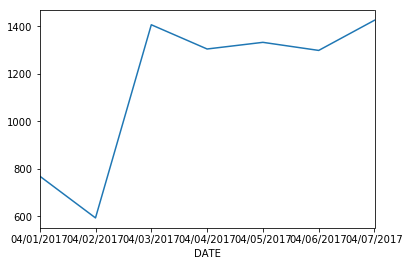

In [38]:
dfpG['Entries (Corrected)'].plot()